In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [3]:
data = pd.read_csv("train.csv")
pair_data = pd.read_csv("pairs.csv")

In [4]:
# Listing some data
data.head(10)

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,NaN,Bars,P_677e840bb6fc7e
1,E_000002eae2a589,Carioca Manero,-22.907225,-43.178244,NaN,NaN,NaN,NaN,BR,NaN,NaN,Brazilian Restaurants,P_d82910d8382a83
2,E_000007f24ebc95,ร้านตัดผมการาเกด,13.780813,100.484900,NaN,NaN,NaN,NaN,TH,NaN,NaN,Salons / Barbershops,P_b1066599e78477
3,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,NaN,Mobile Phone Shops,P_b2ed86905a4cd3
4,E_00001d92066153,Restaurante Casa Cofiño,43.338196,-4.326821,NaN,Caviedes,Cantabria,NaN,ES,NaN,NaN,Spanish Restaurants,P_809a884d4407fb
5,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,NaN,Spas,P_020de174484ec6
6,E_00002a131a2bf6,ministry of youth,29.364352,47.971362,NaN,NaN,NaN,NaN,KW,NaN,NaN,Capitol Buildings,P_9e4e64be602c35
7,E_0000764d65557e,McDonald's,-7.265894,112.749382,"Plaza Surabaya, Pemuda Building",NaN,NaN,NaN,ID,NaN,NaN,Fast Food Restaurants,P_be89c778befb23
8,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,7074394747,Sandwich Places,P_aae7505da98d46
9,E_0000890af22ff5,Flohmarkt Am Rathaus Steglitz,52.457045,13.322475,NaN,NaN,NaN,NaN,DE,NaN,NaN,Flea Markets,P_b6bbe6a8990f34


In [18]:
'Our data has the following columns'
for i in range(len(data.columns)):
    print(data.columns[i])

id
name
latitude
longitude
address
city
state
zip
country
url
phone
categories
point_of_interest


In [5]:
# Observe 2 entries in our data set which represent the same point of interest (POI)
# If these are in our pairs dataset they would be flagged as a match
data[data['point_of_interest']=='P_809a884d4407fb']

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
4,E_00001d92066153,Restaurante Casa Cofiño,43.338196,-4.326821,NaN,Caviedes,Cantabria,NaN,ES,NaN,NaN,Spanish Restaurants,P_809a884d4407fb
560864,E_7e0d8e9138dd56,Casa Cofiño,43.338130,-4.326717,Barrio de los Caviedes s/n,Valdáliga / Cantabria,Spain,39593,ES,NaN,34942708046,Spanish Restaurants,P_809a884d4407fb


In [6]:
# The pairs dataset is pairs of datapoints from our train data with the additional boolean column 'Match'.
pair_data.head()

,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,longitude_2,address_2,city_2,state_2,zip_2,country_2,url_2,phone_2,categories_2,match
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,...,3.635206,NaN,NaN,NaN,NaN,BE,NaN,NaN,Bars,True
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,...,27.845560,batı aydın,aydın,NaN,67500,TR,NaN,NaN,Electronics Stores,False
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,...,121.019827,NaN,NaN,NaN,NaN,PH,NaN,NaN,Spas,True
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,...,-122.064606,NaN,Fairfield,CA,NaN,US,NaN,NaN,Sandwich Places,True
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,F. Torres St.,Davao City,Davao Region,8000,PH,NaN,...,125.611457,E. Jacinto Extension,Davao City,Davao Region,8000,PH,NaN,NaN,"Coffee Shops, Cafés, Dessert Shops",False


In [5]:
# Perform some exploratory data analysis on our pairs data set
X = pair_data.copy()

In [6]:
# We add some additional columns to pairs data comparing their difference in distance 
X['lat diff'] = X['latitude_1'] - X['latitude_2'] # Difference in latitude
X['long diff'] = X['longitude_1'] - X['longitude_2'] # Difference in longitude

X['pair dist'] = (X['lat diff']**2 + X['long diff']**2)**(0.5) # Euclidean distance between data points in each pair entry

In [27]:
X.loc[X['pair dist'] < 0.01, ['id_1', 'name_1', 'latitude_1', 'longitude_1', 'categories_1','id_2', 'name_2', 'latitude_2', 'longitude_2', 'categories_2','pair dist', 'match']].tail(3)

,id_1,name_1,latitude_1,longitude_1,categories_1,id_2,name_2,latitude_2,longitude_2,categories_2,pair dist,match
578903,E_ffff8cc1b92ab3,Fawsley Hall,52.206426,-1.178646,Hotels,E_ad351ad024c4dd,The Spa At Fawsley Hall,52.206974,-1.179698,Gyms or Fitness Centers,0.001186,False
578904,E_ffff989ae206f8,Cricket Wireless Authorized Retailer,36.130623,-86.715636,Mobile Phone Shops,E_a5bc397a4eaeff,Cricket Wireless Authorized Retailer,36.134653,-86.723855,Mobile Phone Shops,0.009155,True
578905,E_ffffca745329ed,焼肉 和家,35.710712,139.775000,BBQ Joints,E_04988888cfff60,Nagomiya,35.710412,139.774890,BBQ Joints,0.000319,True


In [10]:
# Looking at a random point in our pairs set. We see that this point has two locations which are close, however
# these IDs are not a match. One is a POI for a hotel while the other is a POI for the spa IN the hotel.
X[X['pair dist'] < 0.01].loc[578903]

id_1                   E_ffff8cc1b92ab3
name_1                     Fawsley Hall
latitude_1                    52.206426
longitude_1                   -1.178646
address_1           Fawsley Nr Daventry
city_1                         Daventry
state_1                       Northants
zip_1                          NN11 3BA
country_1                            GB
url_1                               NaN
phone_1                             NaN
categories_1                     Hotels
id_2                   E_ad351ad024c4dd
name_2          The Spa At Fawsley Hall
latitude_2                    52.206974
longitude_2                   -1.179698
address_2                           NaN
city_2                              NaN
state_2                             NaN
zip_2                               NaN
country_2                            GB
url_2                               NaN
phone_2                             NaN
categories_2    Gyms or Fitness Centers
match                             False


C:\Users\hfriz\AppData\Local\Temp/ipykernel_13652/1388265126.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(X[X['match']==True][X['pair dist'] < dist_threshold]['pair dist'],color='blue', label="Match")
C:\Users\hfriz\AppData\Local\Temp/ipykernel_13652/1388265126.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(X[X['match']==False][X['pair dist'] < dist_threshold]['pair dist'], color='red', alpha=.6, label="Not Match")


NameError: name 'close_distance_eda' is not defined

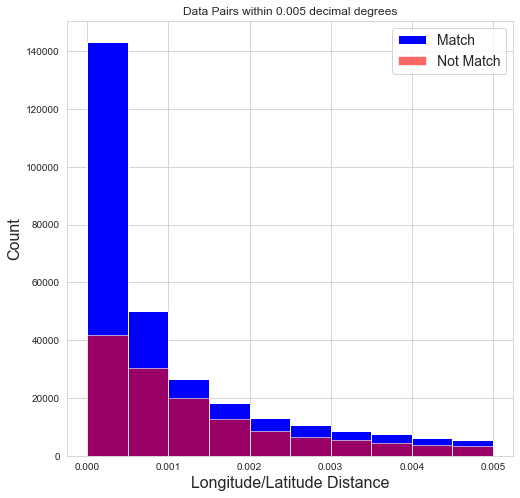

In [28]:
plt.figure(figsize=(8,8))

dist_threshold = 0.005 # Roughly a distance of 1822 ft.

plt.hist(X[X['match']==True][X['pair dist'] < dist_threshold]['pair dist'],color='blue', label="Match")

plt.hist(X[X['match']==False][X['pair dist'] < dist_threshold]['pair dist'], color='red', alpha=.6, label="Not Match")


plt.legend(fontsize=14)
plt.title('Data Pairs within 0.005 decimal degrees')
plt.xlabel("Longitude/Latitude Distance", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.savefig(close_distance_eda, dpi= 'figure', format = 'png')
plt.show()

C:\Users\hfriz\AppData\Local\Temp/ipykernel_13652/1354207916.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(X[X['match']==True][X['pair dist'] > dist_threshold]['pair dist'],color='blue', label="Match")
C:\Users\hfriz\AppData\Local\Temp/ipykernel_13652/1354207916.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(X[X['match']==False][X['pair dist'] > dist_threshold]['pair dist'], color='red', alpha=.6, label="Not Match")


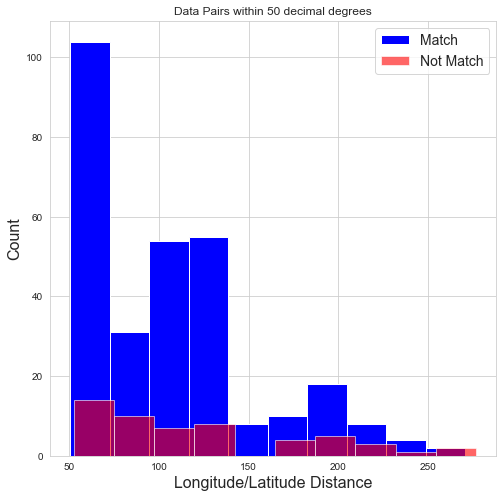

In [30]:
plt.figure(figsize=(8,8))

dist_threshold = 50

plt.hist(X[X['match']==True][X['pair dist'] > dist_threshold]['pair dist'],color='blue', label="Match")

plt.hist(X[X['match']==False][X['pair dist'] > dist_threshold]['pair dist'], color='red', alpha=.6, label="Not Match")


plt.legend(fontsize=14)
plt.title('Data Pairs within 50 decimal degrees')
plt.xlabel("Longitude/Latitude Distance", fontsize=16)
plt.ylabel("Count", fontsize=16)

plt.show()

In [13]:
X[X['pair dist'] > dist_threshold][X['match']==True].loc[572475]

/var/folders/18/vjq5m0md4sb0tpsw852ckn7w0000gn/T/ipykernel_43852/3328610175.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X[X['pair dist'] > dist_threshold][X['match']==True].loc[572475]


id_1                   E_fd2ae15addaf37
name_1              MTR Central Station
latitude_1                    22.282341
longitude_1                   114.15811
address_1                Des Voeux Rd C
city_1                 Central District
state_1                             NaN
zip_1                               NaN
country_1                            HK
url_1             http://www.mtr.com.hk
phone_1                        28818888
categories_1             Metro Stations
id_2                   E_3689062038c709
name_2          MTR Central Station 中環站
latitude_2                    35.762919
longitude_2                  -83.862265
address_2                           NaN
city_2                              NaN
state_2                              TN
zip_2                               NaN
country_2                            US
url_2             http://www.mtr.com.hk
phone_2                             NaN
categories_2             Metro Stations
match                              True


In [14]:
len(X[X['match']==True])

398786

In [15]:
len(X[X['match']==False])

180121

In [16]:
data['categories']

0                           Bars
1          Brazilian Restaurants
2           Salons / Barbershops
3             Mobile Phone Shops
4            Spanish Restaurants
                   ...          
1138807                      NaN
1138808     Housing Developments
1138809         Airport Services
1138810               BBQ Joints
1138811               Surf Spots
Name: categories, Length: 1138812, dtype: object

In [17]:
180121/398786 # Proportion of False matches

0.4516733285521558

In [18]:
data['categories'].head(20)

0                      Bars
1     Brazilian Restaurants
2      Salons / Barbershops
3        Mobile Phone Shops
4       Spanish Restaurants
5                      Spas
6         Capitol Buildings
7     Fast Food Restaurants
8           Sandwich Places
9              Flea Markets
10             Coffee Shops
11      Cafés, Coffee Shops
12        Ramen Restaurants
13      Real Estate Offices
14               Juice Bars
15        Malay Restaurants
16          Massage Studios
17       Convenience Stores
18                      NaN
19                    Lakes
Name: categories, dtype: object